## Experiments on Benchmark Data

In [200]:
library(FCPS)
library(ggplot2)
library(gridExtra)

source("bbvi_multimix.R")

## EngyTime

We use the `EnyTime` benchmark dataset provided in the `FPCS` library. 

In [179]:
data(EngyTime)

set.seed(923)
subsamp <- sample(1:nrow(EngyTime$Data), size = 500)
engytime <- EngyTime$Data[subsamp, ]
rownames(engytime) <- NULL

head(engytime)

X1,X2
-2.048352,1.349031
0.203241,3.025790
2.315944,3.923529
2.080885,0.993722
0.740648,4.125479
1.107236,1.741204


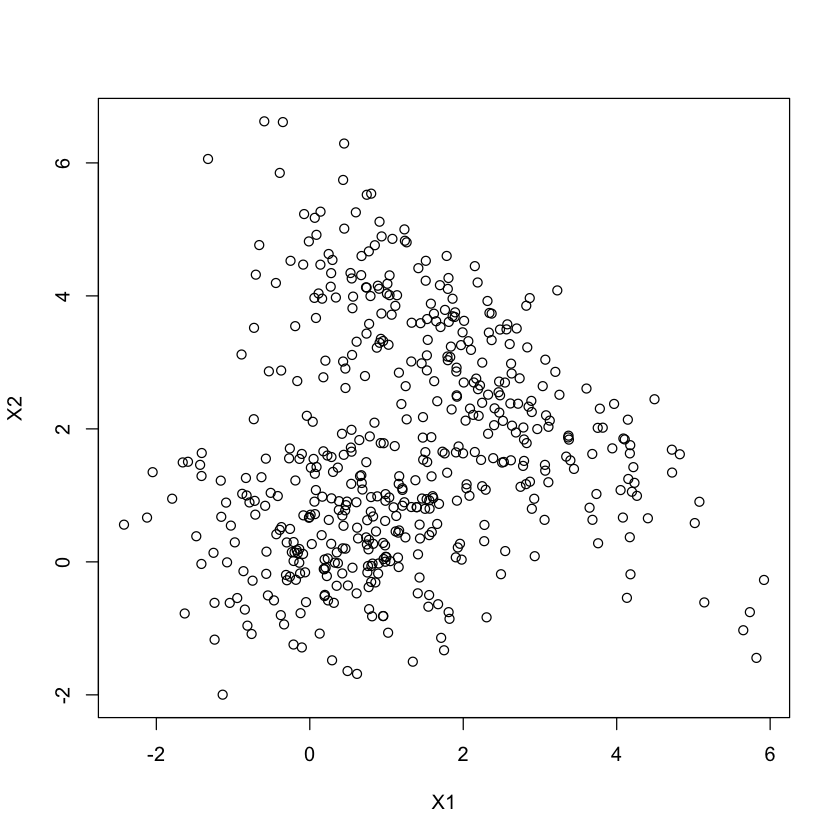

In [180]:
par(bg = "white")
plot(engytime)

In [184]:
engytime.priors <- list(
    m0 = c(2, 2),
    S0 = diag(4, 4, nrow = 2, ncol = 2),
    Sigma = diag(4, 4, nrow = 2, ncol = 2)
)

engytime.rb <- bbvi_multimix(engytime, clusters = 2, mc_size = 100, min_iter = 100, max_iter = max_iter, priors = engytime.priors, learn_rate = rate_rmsprop(1, 0.9), method = "RB", verbose = TRUE, converge = 0.01)
engytime.js <- bbvi_multimix(engytime, clusters = 2, mc_size = 100, min_iter = 100, max_iter = max_iter, priors = engytime.priors, learn_rate = rate_rmsprop(0.01, 0.9), method = "JS+", verbose = TRUE, converge = 0.01)

BBVI-RB: Iteration 2 | lambda: 0.512 | ELBO: -2273.2 | ELBO Change: 1

BBVI-RB: Iteration 3 | lambda: 0.3507 | ELBO: -2789.44 | ELBO Change: 0

BBVI-RB: Iteration 4 | lambda: 0.3073 | ELBO: -2879.27 | ELBO Change: 0

BBVI-RB: Iteration 5 | lambda: 0.3123 | ELBO: -3591.1 | ELBO Change: 0

BBVI-RB: Iteration 6 | lambda: 0.2941 | ELBO: -4605.48 | ELBO Change: 0

BBVI-RB: Iteration 7 | lambda: 0.2886 | ELBO: -4800.57 | ELBO Change: 0

BBVI-RB: Iteration 8 | lambda: 0.099 | ELBO: -3760.55 | ELBO Change: 0

BBVI-RB: Iteration 9 | lambda: 0.1433 | ELBO: -3903.36 | ELBO Change: 0

BBVI-RB: Iteration 10 | lambda: 0.1218 | ELBO: -3107.1 | ELBO Change: 0

BBVI-RB: Iteration 11 | lambda: 0.0783 | ELBO: -3203.42 | ELBO Change: 0

BBVI-RB: Iteration 12 | lambda: 0.1028 | ELBO: -3020.89 | ELBO Change: 0

BBVI-RB: Iteration 13 | lambda: 0.1768 | ELBO: -3251.25 | ELBO Change: 0

BBVI-RB: Iteration 14 | lambda: 0.0815 | ELBO: -3142.17 | ELBO Change: 0

BBVI-RB: Iteration 15 | lambda: 0.0845 | ELBO: -297

In [185]:
rbind(
    summary_multimix(engytime.rb),
    summary_multimix(engytime.js)    
)

method,iterations,time,ELBO,elpd,DIC
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
RB,200,13.094060,-2268.881,-2516.828,4535.476
JS+,101,4.267785,-2231.654,-2363.146,4459.478


## Lsun3D

We use the `Lsun3D` benchmark dataset provided in the `FPCS` library. 

In [122]:
data(Lsun3D)

lsun3d <- Lsun3D$Data
head(lsun3d)

,X,Y,C
1,3.277701,0.814082,0.32657386
2,0.387577,0.176780,0.88804571
3,0.268546,0.582963,0.08098138
4,2.031145,0.244597,0.64392063
5,0.188677,0.461280,0.49663338
6,3.525472,0.265579,0.13821873


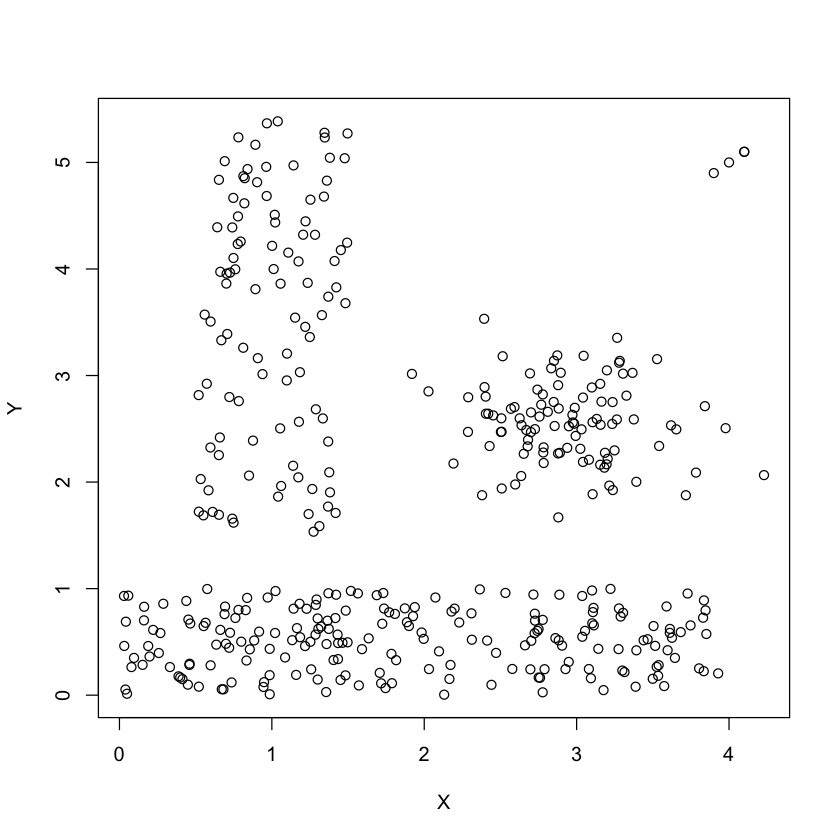

In [123]:
par(bg = "white")
plot(lsun3d[,1:2])

In [134]:
lsun3d.priors <- list(
    m0 = c(2, 2),
    S0 = diag(4, 4, nrow = 2, ncol = 2),
    Sigma = diag(4, 4, nrow = 2, ncol = 2)
)

lsun3d.rb <- bbvi_multimix(lsun3d[,1:2], clusters = 4, mc_size = 100, min_iter = 100, max_iter = 500, priors = lsun3d.priors, learn_rate = rate_rmsprop(1, 0.9), method = "RB", verbose = TRUE, converge = 0.1)
lsun3d.js <- bbvi_multimix(lsun3d[,1:2], clusters = 4, mc_size = 100, min_iter = 100, max_iter = 500, priors = lsun3d.priors, learn_rate = rate_rmsprop(0.1, 0.9), method = "JS+", verbose = TRUE, converge = 0.1)

BBVI-RB: Iteration 2 | lambda: 0.9275 | ELBO: -1805.28 | ELBO Change: 1

BBVI-RB: Iteration 3 | lambda: 0.6594 | ELBO: -2590.43 | ELBO Change: 0

BBVI-RB: Iteration 4 | lambda: 0.2297 | ELBO: -1876.44 | ELBO Change: 0

BBVI-RB: Iteration 5 | lambda: 0.2363 | ELBO: -1895.71 | ELBO Change: 0

BBVI-RB: Iteration 6 | lambda: 0.3316 | ELBO: -1910.94 | ELBO Change: 0

BBVI-RB: Iteration 7 | lambda: 0.3337 | ELBO: -1881.31 | ELBO Change: 0

BBVI-RB: Iteration 8 | lambda: 0.3415 | ELBO: -1849.48 | ELBO Change: 0

BBVI-RB: Iteration 9 | lambda: 0.3408 | ELBO: -1762.82 | ELBO Change: 0

BBVI-RB: Iteration 10 | lambda: 0.3868 | ELBO: -1826.79 | ELBO Change: 0

BBVI-RB: Iteration 11 | lambda: 0.2665 | ELBO: -1903.11 | ELBO Change: 0

BBVI-RB: Iteration 12 | lambda: 0.0853 | ELBO: -1926.78 | ELBO Change: 0

BBVI-RB: Iteration 13 | lambda: 0.1313 | ELBO: -1831.59 | ELBO Change: 0

BBVI-RB: Iteration 14 | lambda: 0.085 | ELBO: -1814.38 | ELBO Change: 0

BBVI-RB: Iteration 15 | lambda: 0.207 | ELBO: -

In [135]:
rbind(
    summary_multimix(lsun3d.rb),
    summary_multimix(lsun3d.js)    
)

method,iterations,time,ELBO,elpd,DIC
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
RB,113,7.805642,-1921.704,-2197.603,3837.532
JS+,113,4.689630,-1859.933,-1795.252,3367.489


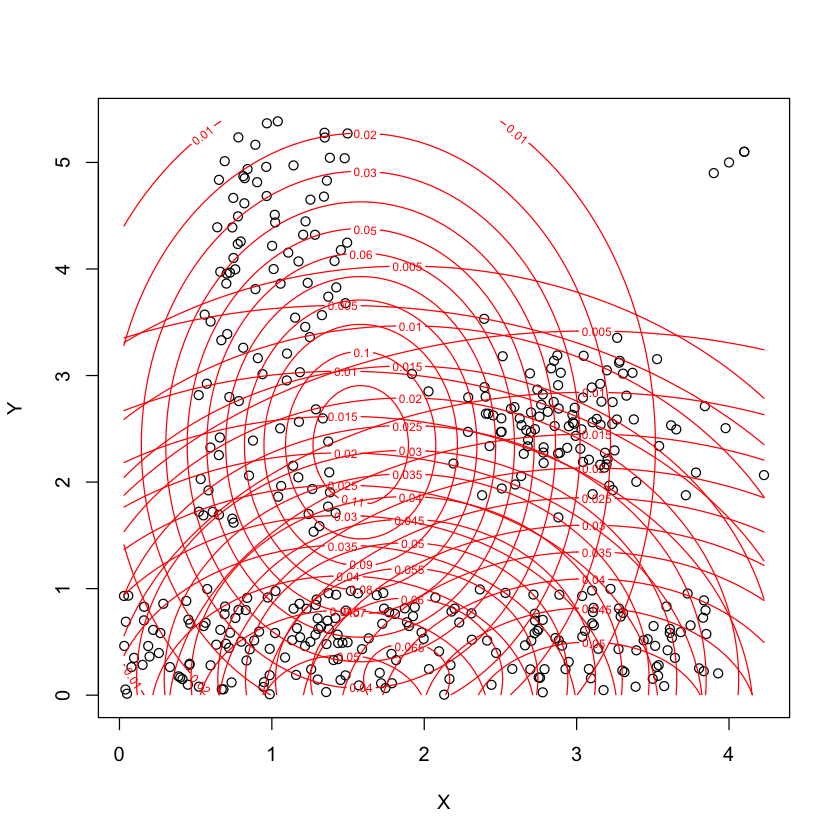

In [136]:
plot_multimix(lsun3d.rb)

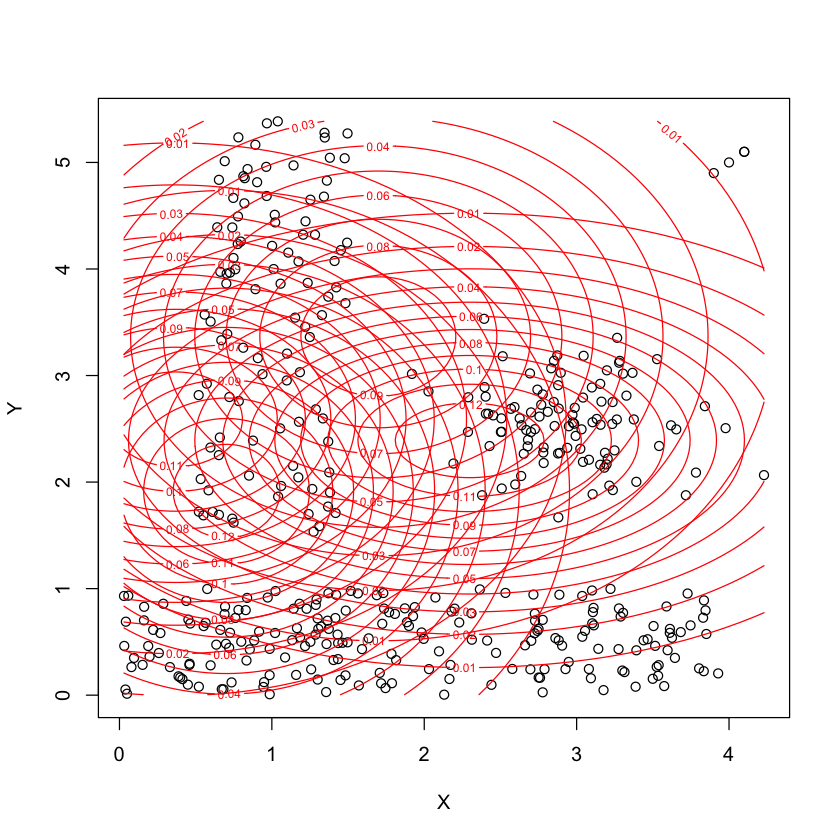

In [137]:
plot_multimix(lsun3d.js)

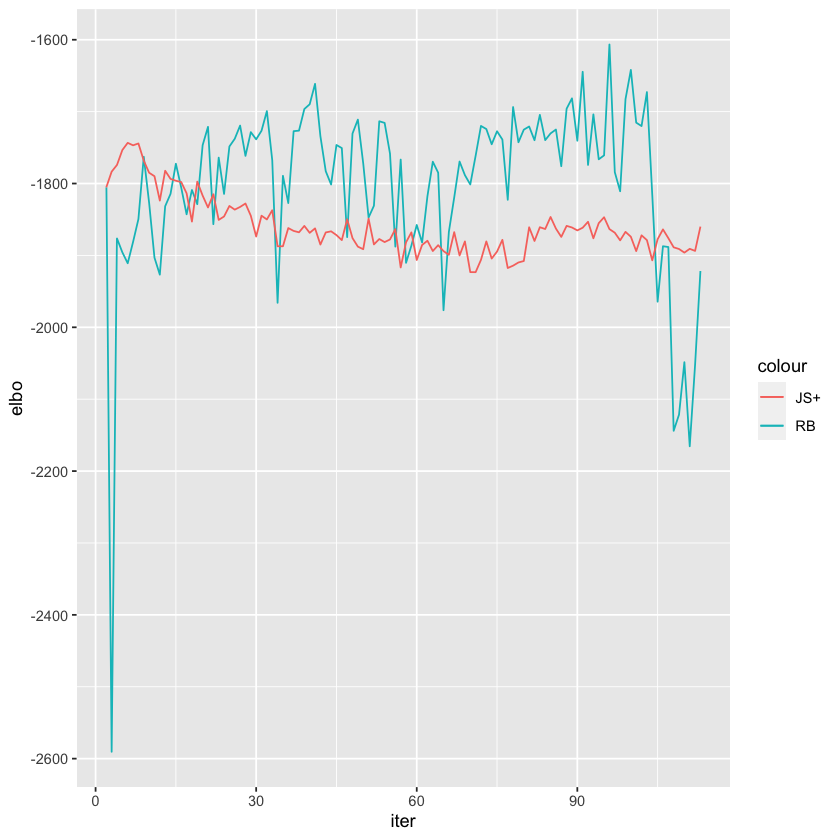

In [191]:
ggplot() +
    geom_line(data = lsun3d.rb$elbo, aes(x = iter, y = elbo, color = "RB")) + 
    geom_line(data = lsun3d.js$elbo, aes(x = iter, y = elbo, color = "JS+"))

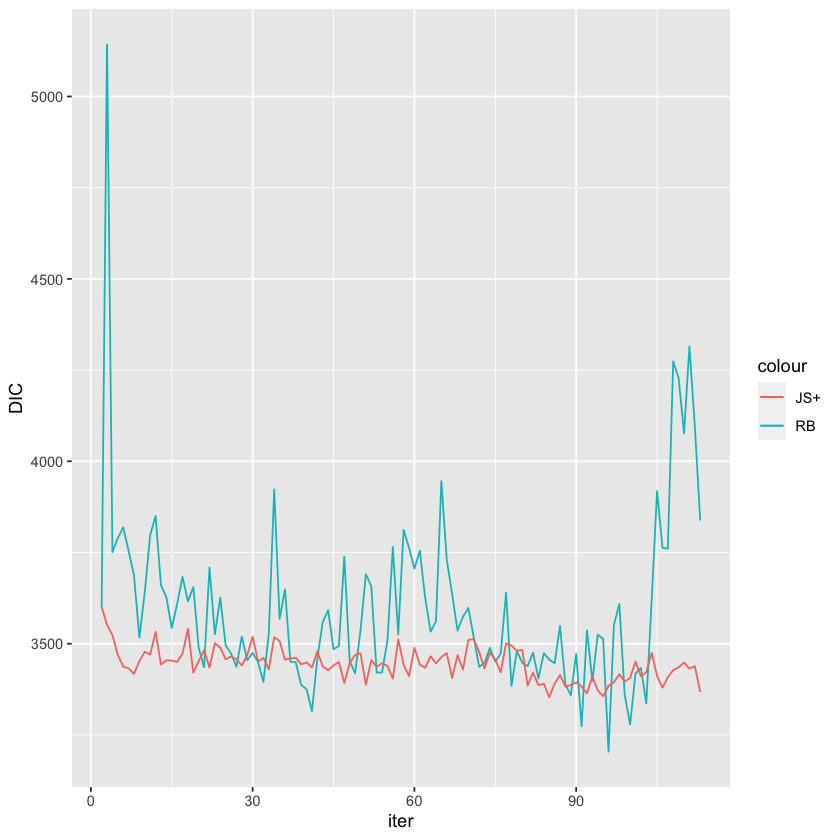

In [192]:
ggplot() +
    geom_line(data = lsun3d.rb$elbo, aes(x = iter, y = DIC, color = "RB")) + 
    geom_line(data = lsun3d.js$elbo, aes(x = iter, y = DIC, color = "JS+"))

## Tetra

In [164]:
data(Tetra)

tetra <- Tetra$Data
head(tetra)

,X1,X2,X3
1,1.295428,0.050829,-0.385217
2,1.409178,-0.035191,-0.251980
3,1.096803,0.246365,-0.415011
4,1.463328,0.265354,-0.513488
5,1.603284,0.080577,-0.470257
6,1.001833,-0.083266,-0.681399


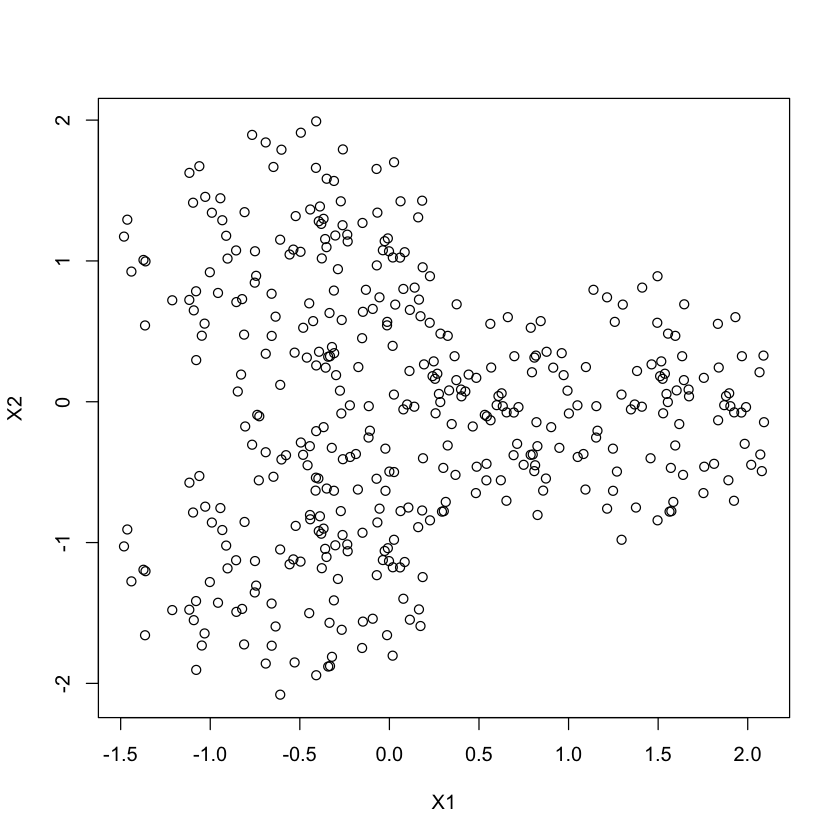

In [165]:
par(bg = "white")
plot(tetra[,1:2])

In [172]:
tetra.priors <- list(
    m0 = c(0, 0, 0),
    S0 = diag(c(4, 4), nrow = 3, ncol = 3),
    Sigma = diag(c(1, 1, 1), nrow = 3, ncol = 3)
)

tetra.rb <- bbvi_multimix(tetra, clusters = 4, mc_size = 100, min_iter = 100, max_iter = 500, priors = tetra.priors, learn_rate = rate_rmsprop(1, 0.9), method = "RB", verbose = TRUE, converge = 0.1)
tetra.js <- bbvi_multimix(tetra, clusters = 4, mc_size = 100, min_iter = 100, max_iter = 500, priors = tetra.priors, learn_rate = rate_rmsprop(0.1, 0.9), method = "JS+", verbose = TRUE, converge = 0.1)

BBVI-RB: Iteration 2 | lambda: 1.1667 | ELBO: -2726.78 | ELBO Change: 1

BBVI-RB: Iteration 3 | lambda: 0.8262 | ELBO: -7015.24 | ELBO Change: 0

BBVI-RB: Iteration 4 | lambda: 0.445 | ELBO: -10747.53 | ELBO Change: 0

BBVI-RB: Iteration 5 | lambda: 0.4654 | ELBO: -6473.32 | ELBO Change: 0

BBVI-RB: Iteration 6 | lambda: 0.2588 | ELBO: -5252.02 | ELBO Change: 0

BBVI-RB: Iteration 7 | lambda: 0.2543 | ELBO: -5075.21 | ELBO Change: 0

BBVI-RB: Iteration 8 | lambda: 0.163 | ELBO: -3671.63 | ELBO Change: 0

BBVI-RB: Iteration 9 | lambda: 0.2184 | ELBO: -3572.48 | ELBO Change: 0

BBVI-RB: Iteration 10 | lambda: 0.2873 | ELBO: -3312.29 | ELBO Change: 0

BBVI-RB: Iteration 11 | lambda: 0.107 | ELBO: -3382.08 | ELBO Change: 0

BBVI-RB: Iteration 12 | lambda: 0.2502 | ELBO: -3816.74 | ELBO Change: 0

BBVI-RB: Iteration 13 | lambda: 0.081 | ELBO: -3203.69 | ELBO Change: 0

BBVI-RB: Iteration 14 | lambda: 0.1106 | ELBO: -3229.45 | ELBO Change: 0

BBVI-RB: Iteration 15 | lambda: 0.1033 | ELBO: -3

In [174]:
rbind(
    summary_multimix(tetra.rb),
    summary_multimix(tetra.js)    
)

method,iterations,time,ELBO,elpd,DIC
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
RB,398,24.343571,-3197.821,-4238.863,6389.142
JS+,149,5.799101,-2470.810,-2812.262,4556.505


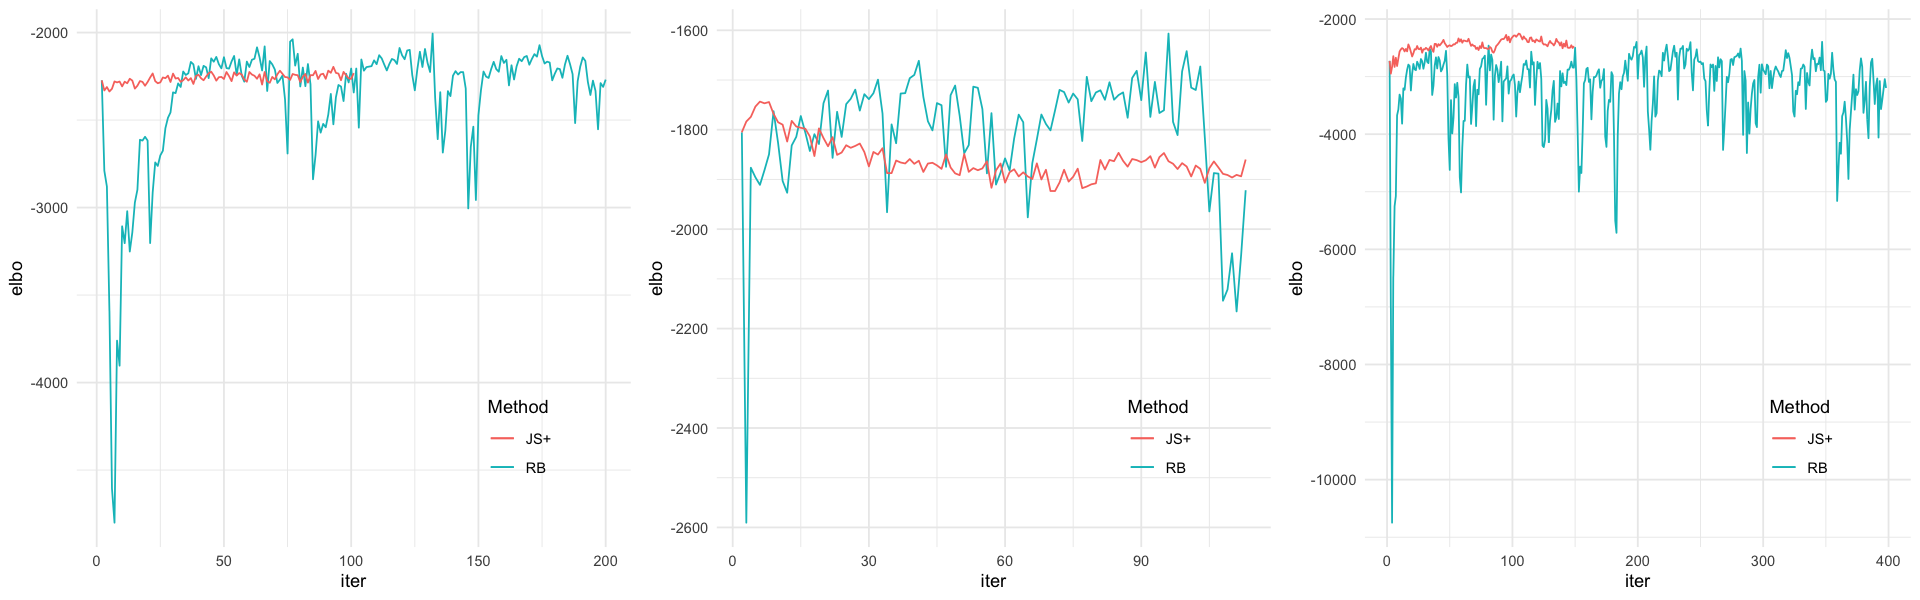

In [212]:
p1 <- ggplot() +
    geom_line(data = engytime.rb$elbo, aes(x = iter, y = elbo, color = "RB")) + 
    geom_line(data = engytime.js$elbo, aes(x = iter, y = elbo, color = "JS+")) +
    scale_color_discrete(name = "Method") +
    theme_minimal() +
    theme(legend.position = c(0.8, 0.2))

p2 <- ggplot() +
    geom_line(data = lsun3d.rb$elbo, aes(x = iter, y = elbo, color = "RB")) + 
    geom_line(data = lsun3d.js$elbo, aes(x = iter, y = elbo, color = "JS+")) +
    scale_color_discrete(name = "Method") +
    theme_minimal() +
    theme(legend.position = c(0.8, 0.2))

p3 <- ggplot() +
    geom_line(data = tetra.rb$elbo, aes(x = iter, y = elbo, color = "RB")) + 
    geom_line(data = tetra.js$elbo, aes(x = iter, y = elbo, color = "JS+")) +
    scale_color_discrete(name = "Method") +
    theme_minimal() +
    theme(legend.position = c(0.8, 0.2))

options(repr.plot.width = 16, repr.plot.height = 5)
grid.arrange(p1, p2, p3, nrow = 1)